Author: Amanpreet Singh

Prediction using Decision Tree Algorithm

Problem Statement:
To Explore and Analyze Decision Tree Algorithm on Iris Dataset. It includes three iris species with 50 samples each as well as some properties about each flower.

Importing Libraries

In [125]:
#loading packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [102]:
#load data
raw_iris = pd.read_csv('Iris.csv')
raw_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Description of the Dataset

In [103]:
raw_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [104]:
raw_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


There are a total of 150 rows and 5 columns in the dataframe.
There are no missing values in any of the columns.

Identifing input and target columns
Creating a train/test/validation split

In [105]:
x=raw_iris.drop(['Species','Id'],axis=1)
y=raw_iris['Species']

#Summary statistics

In [106]:
x.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [107]:
x.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

We don't have any missing values present

Splitting Dataset into train, test and validation sets

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [109]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Training

In [110]:
from sklearn.tree import DecisionTreeClassifier
model_iris = DecisionTreeClassifier(random_state=42)

In [111]:
%%time
model_iris.fit(X_train, y_train)

CPU times: user 5.56 ms, sys: 3.44 ms, total: 9 ms
Wall time: 9.15 ms


DecisionTreeClassifier(random_state=42)

Evaluation

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [113]:
train_preds = model_iris.predict(X_train)
train_preds
pd.value_counts(train_preds)

Iris-virginica     44
Iris-setosa        39
Iris-versicolor    37
dtype: int64

In [114]:
confusion_matrix(y_train,train_preds)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  0, 44]])

In [115]:
model_iris.score(X_train,y_train)

1.0

In [116]:
print(classification_report(y_train,train_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       1.00      1.00      1.00        37
 Iris-virginica       1.00      1.00      1.00        44

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120



The training accuracy is 100%

Visualization

In [117]:
from sklearn.tree import plot_tree, export_text

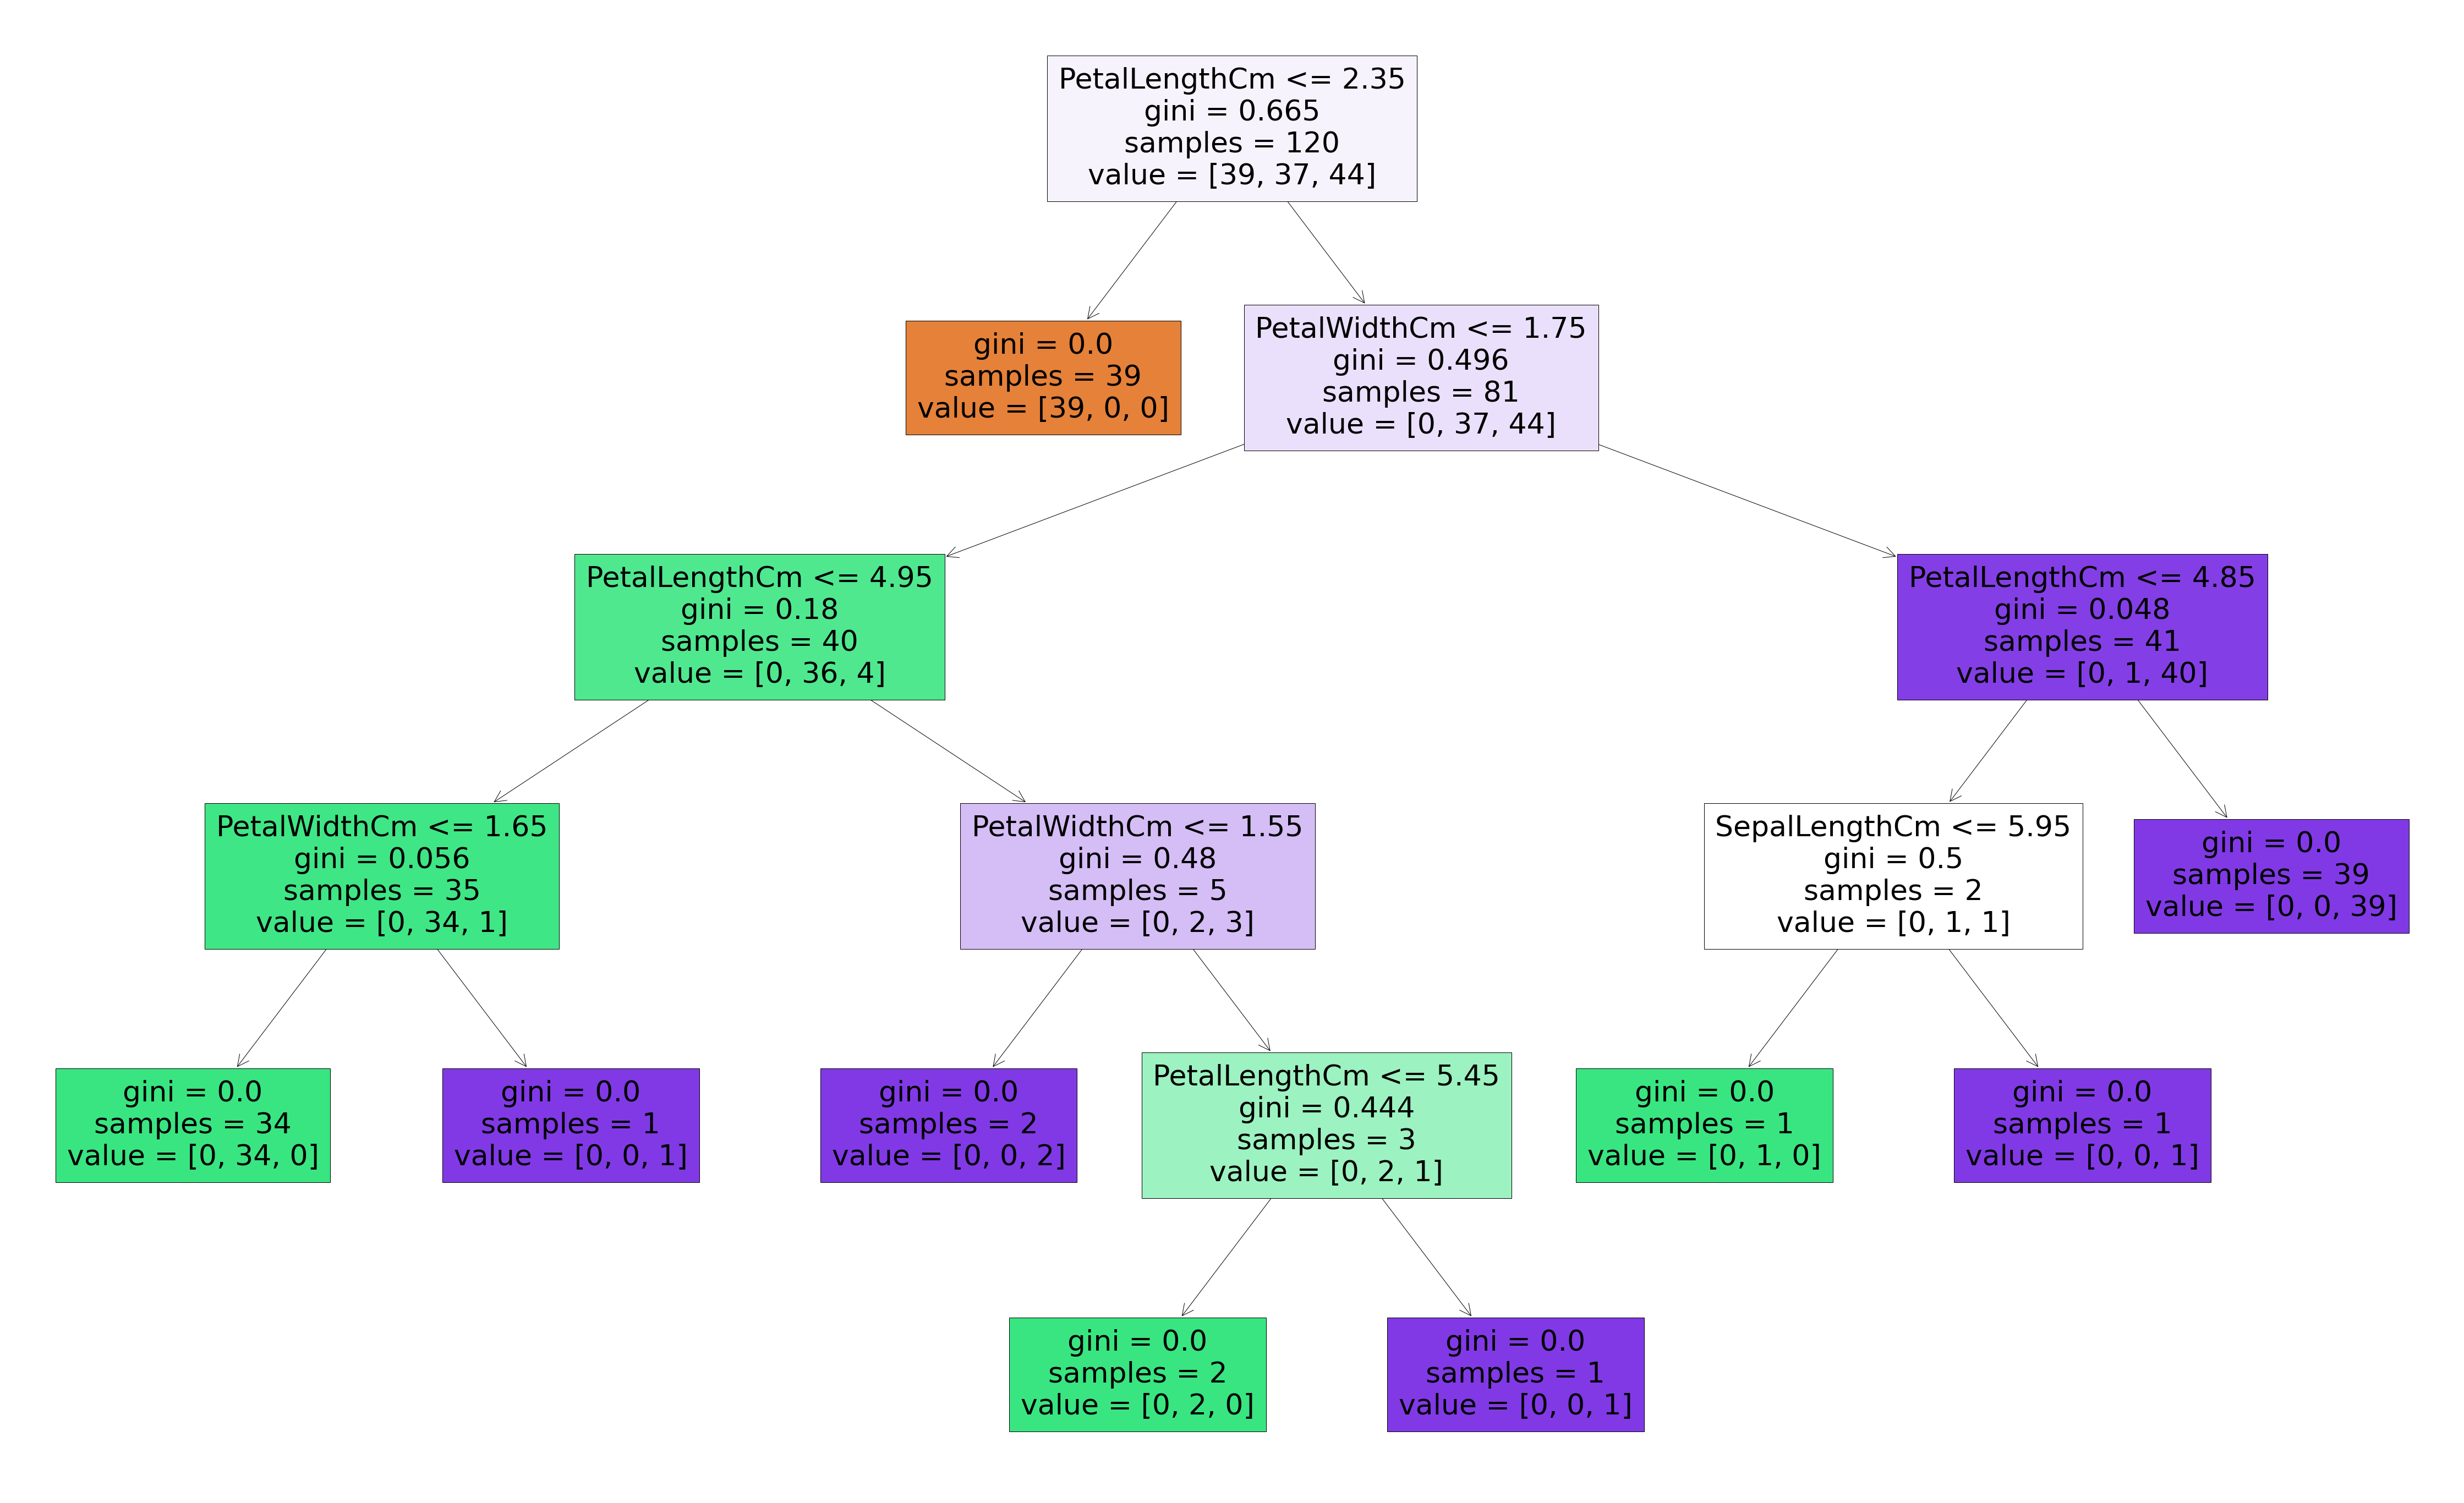

In [118]:
plt.figure(figsize=(80,50))
plot_tree(model_iris, feature_names=X_train.columns, filled=True);

Feature Importance

In [119]:
model_iris.feature_importances_
importance_iris = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_iris.feature_importances_
}).sort_values('importance', ascending=False)

In [120]:
importance_iris.head()

,feature,importance
2,PetalLengthCm,0.560612
3,PetalWidthCm,0.426854
0,SepalLengthCm,0.012534
1,SepalWidthCm,0.000000


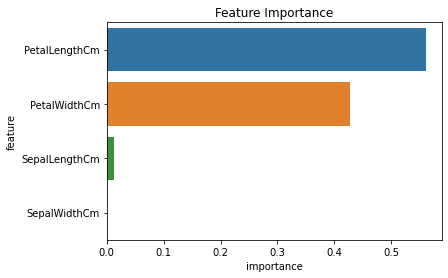

In [121]:
plt.title('Feature Importance')
sns.barplot(data=importance_iris.head(10), x='importance', y='feature');

Making Predictions on New Inputs

In [122]:
def predict_user_input(model_iris, single_input):
    X_input = pd.DataFrame([single_input])
    pred = model_iris.predict(X_input)[0]
    prob = model_iris.predict_proba(X_input)[0][list(model_iris.classes_).index(pred)]
    return pred, prob

Enter the values you want to check

In [123]:
user_input = {'SepalLengthCm' : 5.5,
             'SepalWidthCm' : 2.6,
             'PetalLengthCm': 4.4,
             'PetalWidthCm' : 1.2}

In [124]:
predict_user_input(model_iris, user_input)

('Iris-versicolor', 1.0)

Thank you